<a href="https://colab.research.google.com/github/RobertSparadrap/neronal_network/blob/main/neuronal_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [3]:
train = datasets.MNIST("./datasets", download=True, train=True)
test = datasets.MNIST("./datasets", download=True, train=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/train-images-idx3-ubyte.gz to ./datasets/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ./datasets/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



In [4]:
train[0][0]

In [5]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5]), transforms.Lambda(lambda x: x.double())])

train = datasets.MNIST("./datasets", download=True, train=True, transform=transform)
test = datasets.MNIST("./datasets", download=True, train=False, transform=transform)

In [6]:
train[0][0]

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1

In [7]:
trainloader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test, batch_size=64, shuffle=True)

In [8]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

In [9]:
images.squeeze().shape

torch.Size([64, 28, 28])

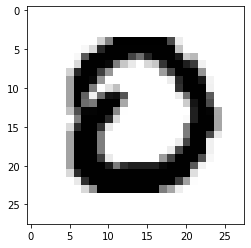

In [10]:
plt.imshow(images[0].squeeze(), cmap="gray_r")

In [11]:
def show_images(images, labels, rows=6, cols=10):
  fig, axes = plt.subplots(rows, cols, figsize=(cols, rows))
  for i in range(cols*rows):
    ridx = i // cols
    cidx = i % cols
    ax = axes[ridx, cidx]
    ax.axis("off")
    ax.imshow(images[i].squeeze(), cmap="gray_r")
    ax.set_title("{}" .format(labels[i]))
  plt.show()
  return fig

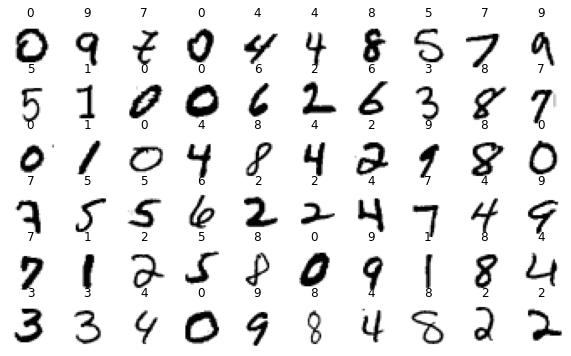

In [12]:
fig = show_images(images, labels)

In [13]:
def convert_to_vector(labels):
  new_labels = []
  for label in labels:
    x = np.zeros(10)
    x[label] = 1.
    new_labels.append(x)
  new_labels = torch.from_numpy(np.vstack(new_labels))
  return new_labels

In [14]:
print(labels[0])
labels = convert_to_vector(labels)
print(labels[0])

tensor(0)
tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=torch.float64)


In [15]:
import torch.nn as nn

INPUT_SIZE = 28*28
HIDDEN1_SIZE = 128
HIDDEN2_SIZE = 64
OUTPUT_SIZE = 10

class DigiNet(nn.Module):
  def __init__(self):
    super(DigiNet, self).__init__()
    self.input_layer_weights = nn.Linear(INPUT_SIZE, HIDDEN1_SIZE)
    self.hidden_layer1_weights = nn.Linear(HIDDEN1_SIZE, HIDDEN2_SIZE)
    self.hidden_layer2_weights = nn.Linear(HIDDEN2_SIZE, OUTPUT_SIZE)
 
    self.act1 = nn.ReLU()
    self.act2 = nn.ReLU()
    self.act3 = nn.Softmax(dim=1)

    self.double()

  def forward(self, x):
    x = self.input_layer_weights(x)
    x = self.act1(x)
    x = self.hidden_layer1_weights(x)
    x = self.act2(x)
    x = self.hidden_layer2_weights(x)
    x = self.act3(x)
    return x

In [16]:
model = DigiNet()
images = images.view(images.shape[0], -1)

In [17]:
prediction = model(images)

In [18]:
print("Label:", labels[0])
n = 0
for i in prediction[0]:
  print(n, "=", i.tolist()*100, "%")
  n += 1

Label: tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=torch.float64)
0 = 9.178306310232987 %
1 = 9.418880103416786 %
2 = 9.779624891415093 %
3 = 11.122692211845028 %
4 = 8.975758148337244 %
5 = 12.022408946096371 %
6 = 10.700392508885193 %
7 = 10.162498298922559 %
8 = 9.80116371822431 %
9 = 8.838274862624436 %


In [19]:
mse = nn.MSELoss()
print(prediction.shape)
print(labels.shape)
loss =mse(prediction, labels)
print(loss)

torch.Size([64, 10])
torch.Size([64, 10])
tensor(0.0907, dtype=torch.float64, grad_fn=<MseLossBackward0>)


In [20]:
weights = model.parameters()
print(list(weights))

[Parameter containing:
tensor([[ 2.2730e-02,  6.9844e-04,  2.1774e-02,  ...,  3.5692e-02,
         -1.9155e-02, -3.5204e-02],
        [-1.9375e-02,  1.2627e-02, -3.4782e-02,  ...,  3.8885e-03,
         -1.0716e-02,  3.3446e-02],
        [-2.7943e-02, -9.2959e-03, -1.8575e-02,  ..., -2.4796e-02,
         -2.0028e-03, -8.1787e-04],
        ...,
        [ 1.3872e-02,  1.8840e-03, -2.7280e-02,  ..., -3.1740e-02,
         -2.7066e-03,  3.3621e-02],
        [ 1.4323e-02, -3.4703e-02, -3.4198e-02,  ..., -2.3951e-02,
         -3.1415e-02, -2.9147e-05],
        [-1.2995e-03, -2.3664e-03,  3.3277e-02,  ..., -1.8521e-02,
         -3.0640e-02,  2.0402e-02]], dtype=torch.float64, requires_grad=True), Parameter containing:
tensor([ 0.0068,  0.0264, -0.0165, -0.0014,  0.0263,  0.0124,  0.0156, -0.0127,
        -0.0338, -0.0129, -0.0187, -0.0007,  0.0155,  0.0063, -0.0294,  0.0325,
         0.0030,  0.0199,  0.0330, -0.0083, -0.0258,  0.0312, -0.0263, -0.0160,
         0.0128,  0.0134, -0.0032, -0.019

In [21]:
loss.backward()

In [22]:
from torch import optim

def train_model(model, epochs=15, lr=0.0035, momentum=0.7):
  sgd = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
  mse = nn.MSELoss()
  for epoch in range(epochs):
    _loss = 0
    for images, labels in trainloader:
      images = images.view(images.shape[0], -1)
      sgd.zero_grad()
      preds = model(images)
      labels = convert_to_vector(labels)
      loss = mse(preds, labels)
      loss.backward()
      sgd.step()
      _loss += loss.item()
    else:
      print("epoch {} - training loss: {}" .format(epoch, _loss/len(trainloader)))
  return model

In [23]:
model = train_model(model)

epoch 0 - training loss: 0.08991790842982718
epoch 1 - training loss: 0.08924751067779936
epoch 2 - training loss: 0.0885447961381133
epoch 3 - training loss: 0.08767308034179816
epoch 4 - training loss: 0.08640298346982406
epoch 5 - training loss: 0.08422589759560291
epoch 6 - training loss: 0.08052644590058877
epoch 7 - training loss: 0.07521230873355127
epoch 8 - training loss: 0.06901941586852046
epoch 9 - training loss: 0.06277953938065298
epoch 10 - training loss: 0.05656079829440668
epoch 11 - training loss: 0.05043764837509305
epoch 12 - training loss: 0.04473682946448315
epoch 13 - training loss: 0.03981212314707533
epoch 14 - training loss: 0.03567211765860102


In [31]:
preds = model(images)
print(preds[0].argmax().tolist())

0


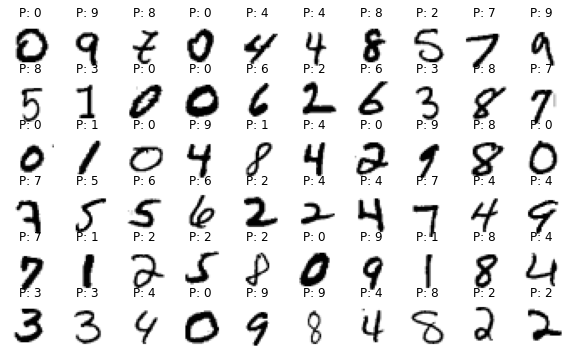

In [33]:
def show_images2(images, labels, preds, rows=6, cols=10):
  fig, axes = plt.subplots(rows, cols, figsize=(cols, rows))
  for i in range(cols*rows):
    ridx = i // cols
    cidx = i % cols
    ax = axes[ridx, cidx]
    ax.axis("off")
    ax.imshow(images[i].view(28, 28), cmap="gray_r")
    ax.set_title("P: {}" .format(preds[i].argmax().tolist()))
  plt.show()
  return fig

fig = show_images2(images, labels, preds)

In [34]:
def train_model(model, epochs=15, lr=0.0035, momentum=0.7):
  sgd = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
  mse = nn.MSELoss()
  losses = []
  for epoch in range(epochs):
    _loss = 0
    for images, labels in trainloader:
      images = images.view(images.shape[0], -1)
      sgd.zero_grad()
      preds = model(images)
      labels = convert_to_vector(labels)
      loss = mse(preds, labels)
      loss.backward()
      sgd.step()
      _loss += loss.item()
    else:
      avg_loss = _loss/len(trainloader)
      losses.append(avg_loss)
      print("epoch {} - training loss: {}" .format(epoch, _loss/len(trainloader)))
  return model, losses

In [35]:
model = DigiNet()
model, losses = train_model(model, epochs=50, lr=0.0035, momentum=0.7)

epoch 0 - training loss: 0.08968053275755897
epoch 1 - training loss: 0.0886526191448389
epoch 2 - training loss: 0.08741407304584202
epoch 3 - training loss: 0.08557697337182318
epoch 4 - training loss: 0.08248219406789928
epoch 5 - training loss: 0.07750032291319266
epoch 6 - training loss: 0.0715095219653972
epoch 7 - training loss: 0.06493050977877868
epoch 8 - training loss: 0.05787918948149511
epoch 9 - training loss: 0.0510707207428482
epoch 10 - training loss: 0.04491462979933915
epoch 11 - training loss: 0.03970063197702895
epoch 12 - training loss: 0.03537040073975992
epoch 13 - training loss: 0.031813919514438585
epoch 14 - training loss: 0.02893391487521422
epoch 15 - training loss: 0.026650591798885025
epoch 16 - training loss: 0.02484190245337393
epoch 17 - training loss: 0.023407964441524886
epoch 18 - training loss: 0.02224997360356636
epoch 19 - training loss: 0.021296282073988124
epoch 20 - training loss: 0.020506290636618754
epoch 21 - training loss: 0.01982935017681

In [36]:
def plot_loss(losses):
  fig = plt.figure()
  plt.plot(losses, color="g")
  plt.ylim(bottom=0, top=0.1)
  plt.xlabel("epoch")
  plt.ylabel("loss")
  plt.show()
  return fig

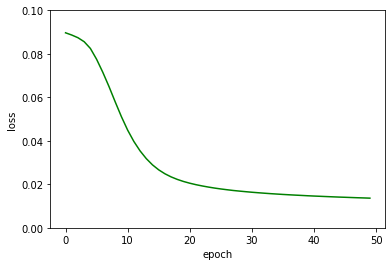

In [37]:
fig = plot_loss(losses)

In [41]:
def validate_model(model, testset):
  correct_count, all_count = 0, 0
  wrong_predictions = []
  for image, label in testset:
    with torch.no_grad():
      pred = model(image.view(1, -1))[0]
    pred_label = pred.argmax()
    if pred_label == label:
      correct_count += 1
    else:
      wrong_predictions.append((image, label, pred_label))
    all_count += 1
  return all_count, correct_count/all_count, wrong_predictions

In [42]:
total, accruacy, wrong_predictions = validate_model(model, test)
print("image tested : {}".format(total))
print("accruacy: {:.2%}".format(accruacy))

image tested : 10000
accruacy: 91.75%


In [45]:
import random

def show_wrong_predictions(wrong_preds, rows=5, cols=5):
  preds = random.sample(wrong_preds, rows*cols)
  fig, axes = plt.subplots(rows, cols, figsize=(cols, rows))
  for idx, (img, label, pred_label) in enumerate(preds):
    ridx = idx // cols
    cidx = idx % cols
    ax = axes[ridx, cidx]
    ax.axis("off")
    ax.imshow(img.squeeze(), cmap="gray_r")
    ax.set_title("{} != {}".format(label, pred_label))
  plt.show()
  return fig

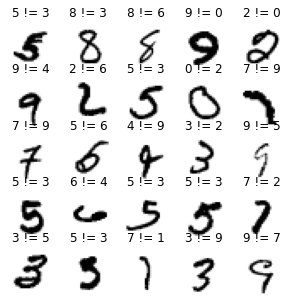

In [46]:
fig = show_wrong_predictions(wrong_predictions)

In [50]:
def show_prediction_proba(img, predictions):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
  ax1.imshow(img.squeeze().view(28, 28), cmap="gray_r")
  ax2.bar(np.arange(0, 10), predictions.detach().numpy())
  ax2.set_title("probability distribution")
  plt.show()
  return fig

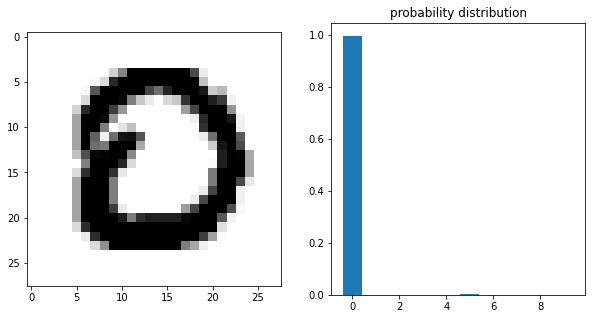

In [51]:
idx = 0
img = images[idx]
pred = model(img.view(1, -1))
fig = show_prediction_proba(img, pred.squeeze())

In [53]:
params = list(model.parameters())
print(params[0].shape)
print(params[0])

torch.Size([128, 784])
Parameter containing:
tensor([[-0.0106, -0.0179,  0.0180,  ...,  0.0266, -0.0165,  0.0084],
        [ 0.0072, -0.0011,  0.0119,  ...,  0.0023, -0.0368, -0.0131],
        [ 0.0276, -0.0187,  0.0320,  ..., -0.0267, -0.0003, -0.0100],
        ...,
        [ 0.0183, -0.0147,  0.0065,  ..., -0.0147,  0.0160,  0.0034],
        [ 0.0145, -0.0036,  0.0220,  ..., -0.0008,  0.0239, -0.0018],
        [-0.0228,  0.0324, -0.0238,  ...,  0.0202,  0.0103, -0.0266]],
       dtype=torch.float64, requires_grad=True)


In [54]:
params[0][0].shape

torch.Size([784])

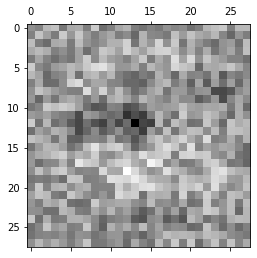

In [55]:
neuron = params[0][0].reshape(28, 28).detach()
plt.matshow(neuron, cmap="gray")
plt.show()

In [56]:
def show_layer(neurons, rows, cols, width=28, height=28):
  count = len(neurons)
  fig, axes = plt.subplots(rows, cols, figsize=(cols, rows))
  for idx in range(0, count):
    ridx = idx//cols
    cidx = idx % cols
    ax = axes[ridx, cidx]
    ax.matshow(neurons[idx].reshape(width, height).detach(), cmap="gray")
    ax.axis("off")
  plt.show()
  return fig

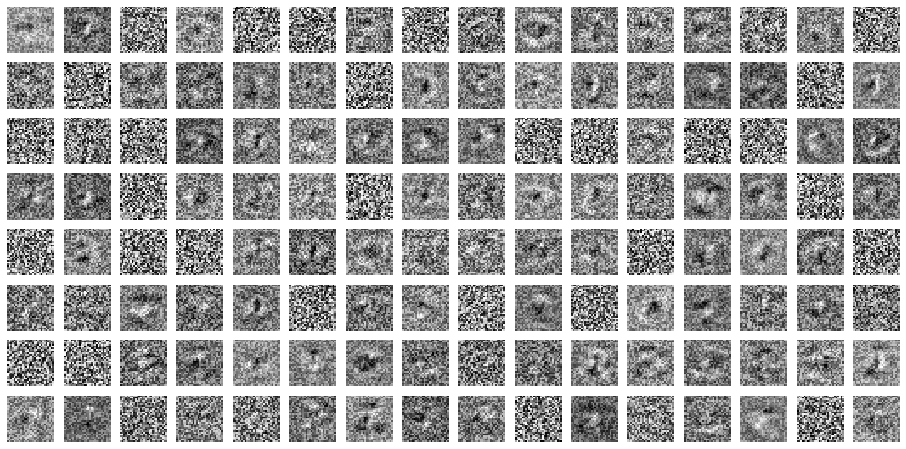

In [57]:
fig = show_layer(params[0], 8, 16)

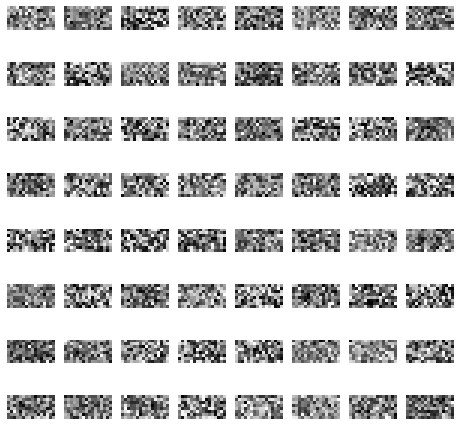

In [59]:
fig = show_layer(params[2], 8, 8, 8, 16)

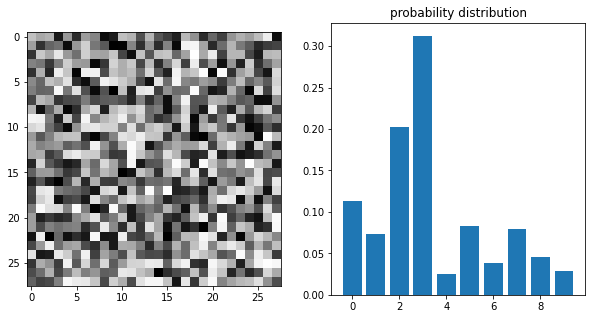

In [62]:
img = torch.from_numpy(np.random.rand(28, 28)*2-1)
pred = model(img.view(1, -1))
fig = show_prediction_proba(img, pred.squeeze())